In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load data from a CSV file
data = pd.read_csv('/content/statsfinal.csv')

# Convert 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)
data.set_index('Date', inplace=True)


<ipython-input-7-218f26c9d765>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


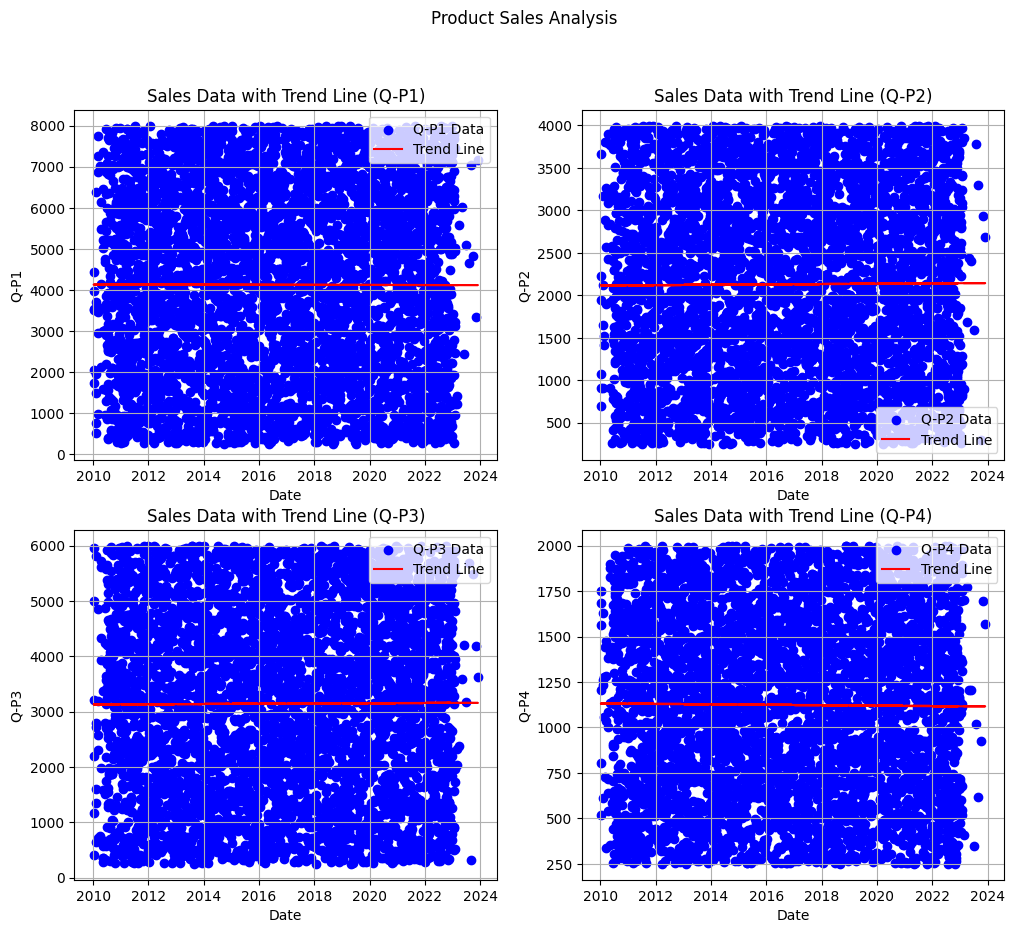

In [17]:
# Define target columns
target_columns = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']

# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Product Sales Analysis')

from scipy import stats

for i, target_column in enumerate(target_columns):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    # Scatter plot of historical sales data
    ax.scatter(data.index, data[target_column], label=f'{target_column} Data', color='b', marker='o')

    # Fit a linear regression trend line
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data[target_column])
    trend_line = intercept + slope * np.arange(len(data))
    ax.plot(data.index, trend_line, label='Trend Line', color='r')

    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel(target_column)
    ax.set_title(f'Sales Data with Trend Line ({target_column})')

    # Show legend and grid
    ax.legend()
    ax.grid(True)


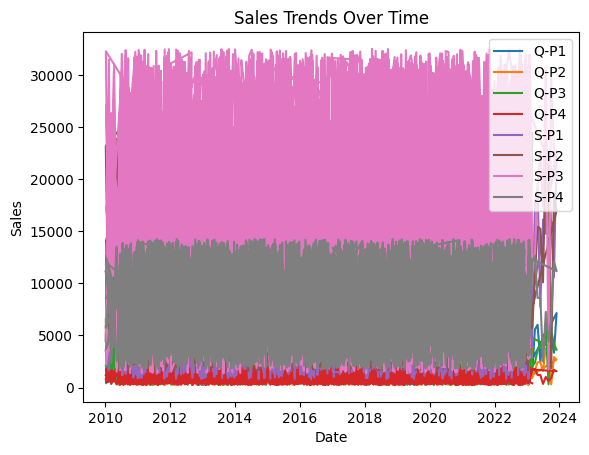

In [10]:
# Check for numeric columns
numeric_columns = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']
numeric_df = data[numeric_columns]

if not numeric_df.empty:
    # Group data by 'Date' to get sales trends
    sales_trends = numeric_df.groupby(data.index).sum()

    # Create line charts to visualize sales trends
    for column in numeric_columns:
        plt.plot(data.index, data[column], label=column)

    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(loc='upper right')
    plt.show()
else:
    print("No numeric data to plot")


In [11]:
if not numeric_df.empty:
    top_selling_product = numeric_df.sum().idxmax()
    peak_sales_period = sales_trends.sum().idxmax()
    customer_preferred_product = numeric_df.sum().idxmax()

    print(f"Top-Selling Product: {top_selling_product}")
    print(f"Peak Sales Period: {peak_sales_period}")
    print(f"Customer Preferred Product: {customer_preferred_product}")


Top-Selling Product: S-P3
Peak Sales Period: S-P3
Customer Preferred Product: S-P3


In [12]:
# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Calculate summary statistics
print(data.describe())


        Unnamed: 0         Q-P1         Q-P2         Q-P3         Q-P4  \
count  4574.000000  4574.000000  4574.000000  4574.000000  4574.000000   
mean   2299.372759  4123.342589  2129.705072  3143.769786  1123.738303   
std    1327.857219  2243.691134  1089.503315  1671.052866   497.813557   
min       0.000000   254.000000   251.000000   250.000000   250.000000   
25%    1149.250000  2149.500000  1167.250000  1695.250000   696.000000   
50%    2299.500000  4138.000000  2133.500000  3196.500000  1137.000000   
75%    3449.750000  6072.000000  3069.750000  4564.750000  1545.750000   
max    4599.000000  7998.000000  3998.000000  6000.000000  2000.000000   

               S-P1          S-P2          S-P3          S-P4  
count   4574.000000   4574.000000   4574.000000   4574.000000  
mean   13070.996006  13502.330157  17039.232239   8012.254104  
std     7112.500894   6907.451018   9057.106532   3549.410662  
min      805.180000   1591.340000   1355.000000   1782.500000  
25%     6813.

<Figure size 640x480 with 0 Axes>

In [18]:
# Model selection: Choose a time series forecasting model
# (e.g., moving average, ARIMA, exponential smoothing)
# Data splitting: Split into training and test sets
train_data = data.iloc[:-int(len(data) * 0.2)]
test_data = data.iloc[-int(len(data) * 0.2):]


In [14]:
# Model training and validation: Train the model and calculate MAE
ma = {}
test_maes = {}

for target_column in target_columns:
    ma[target_column] = train_data[target_column].rolling(4).mean()
    test_predictions = ma[target_column].iloc[-len(test_data):]
    test_maes[target_column] = np.mean(np.abs(test_predictions - test_data[target_column]))

# Print the MAEs for each target column
for target_column in target_columns:
    print(f'MAE on test set ({target_column}): {test_maes[target_column]}')


MAE on test set (Q-P1): nan
MAE on test set (Q-P2): nan
MAE on test set (Q-P3): nan
MAE on test set (Q-P4): nan


In [15]:
# Forecasting future prediction: Predict sales for the next quarter
next_quarter_sales = {}

for target_column in target_columns:
    next_quarter_sales[target_column] = ma[target_column].iloc[-1]

# Print the predictions for each target column
for target_column in target_columns:
    print(f'Predicted sales for the next quarter ({target_column}): {next_quarter_sales[target_column]}')


Predicted sales for the next quarter (Q-P1): 4293.0
Predicted sales for the next quarter (Q-P2): 2421.0
Predicted sales for the next quarter (Q-P3): 2120.5
Predicted sales for the next quarter (Q-P4): 1492.5


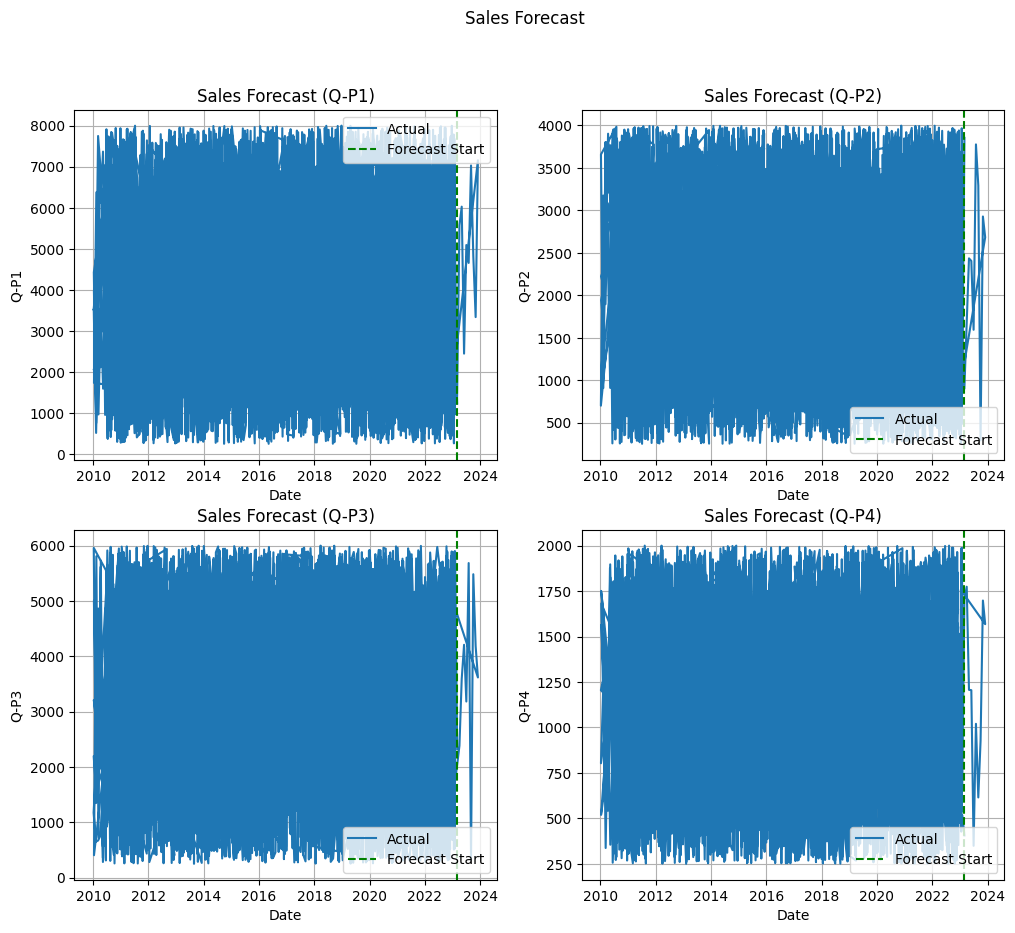

In [16]:
# Visualization and reporting: Plot actual sales and forecasts
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Sales Forecast')

for i, target_column in enumerate(target_columns):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    ax.plot(data.index, data[target_column], label='Actual')
    ax.axvline(data.index[-1], color='g', linestyle='--', label='Forecast Start')

    ax.set_xlabel('Date')
    ax.set_ylabel(target_column)
    ax.set_title(f'Sales Forecast ({target_column})')
    ax.legend()
    ax.grid(True)

# Show the plots
plt.show()
